# Practice notebook for confidence intervals using NHANES data

This notebook will give you the opportunity to practice working with confidence intervals using the NHANES data.

You can enter your code into the cells that say "enter your code here", and you can type responses to the questions into the cells that say "Type Markdown and Latex".

Note that most of the code that you will need to write below is very similar to code that appears in the case study notebook.  You will need to edit code from that notebook in small ways to adapt it to the prompts below.

To get started, we will use the same module imports and read the data in the same way as we did in the case study:

In [191]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm

da = pd.read_csv("nhanes_2015_2016.csv")

## Question 1

Restrict the sample to women between 35 and 50, then use the marital status variable [DMDMARTL](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDMARTL) to partition this sample into two groups - women who are currently married, and women who are not currently married.  Within each of these groups, calculate the proportion of women who have completed college.  Calculate 95% confidence intervals for each of these proportions.

In [193]:
dx = da.loc[(da.RIDAGEYR >= 35) & (da.RIDAGEYR <= 50), :] # Restrict to people between 35 and 50 years old
dx["RIAGENDR"] = dx.loc[(da.RIAGENDR == 2), :]                        # Restrict to women-only
dx = dx[["DMDMARTL", "RIAGENDR", "DMDEDUC2"]].dropna() 

dx["DMDMARTL"] = da.DMDMARTL.replace({1: "Married", 2: "Not", 3: "Not", 4: "Not", 5: "Not", 6: "Not", 77: np.nan, 99: np.nan})  # np.nan represents a missing value
#print(dx)


# Summarize the data by calculating the proportion of women who completed college responses and the sample size
p_college = dx.groupby("DMDMARTL")["DMDEDUC2"].agg([lambda z: np.mean(z>=4.0), lambda z: np.mean(z<=3.0), "size"])
p_college.columns = ["College", "Not College", "N"]

print("\n", p_college)


print("\n\n")


print("Standard Errors:\n")
p1 = p_college.College.Married # Married & College proportion
n1 = p_college.N.Married # Total number of marrried
se_college_married = np.sqrt(p1 * (1 - p1) / n1)
print("SE of college and married:\n", se_college_married)

p2 = p_college.College.Not # Not married & College proportion
n2 = p_college.N.Not # Total number of not married
se_college_not_married = np.sqrt(p2 * (1 - p2) / n2)
print("\nSE of college and not-married:\n", se_college_not_married)

print("\n\nConfidence intervals:\n")
print("-for married college females:\n")
lcb1 = p1 - 1.96 * np.sqrt(p1 * (1 - p1) / n1)  
ucb1 = p1 + 1.96 * np.sqrt(p1 * (1 - p1) / n1)  
print(lcb1, ucb1)
print("\n-for not-married college females:\n")
lcb2 = p2 - 1.96 * np.sqrt(p2 * (1 - p2) / n2)  
ucb2 = p2 + 1.96 * np.sqrt(p2 * (1 - p2) / n2)
print(lcb2, ucb2)


            College  Not College    N
DMDMARTL                            
Married   0.670379     0.329621  449
Not       0.562130     0.437870  338



Standard Errors:

SE of college and married:
 0.022184241991308255

SE of college and not-married:
 0.026985632877162748


Confidence intervals:

-for married college females:

0.6268975048507106 0.713859733456639

-for not-married college females:

0.5092383370755539 0.6150220179540319


<ipython-input-193-018e9ab08303>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dx["RIAGENDR"] = dx.loc[(da.RIAGENDR == 2), :]                        # Restrict to women-only


__Q1a.__ Identify which of the two confidence intervals is wider, and explain why this is the case. 

not-married college females has a wider confidence interval because the sample size of not-married females is much smaller than the sample size of married females.

__Q1b.__ Write 1-2 sentences summarizing these findings for an audience that does not know what a confidence interval is (the goal here is to report the substance of what you learned about how marital status and educational attainment are related, not to teach a person what a confidence interval is).

Our sample data shows that of the women who are married, around 67% of them completed college. Whereas around 33% of them did not complete college. Of the women who are not married, 56% of them completed college, whereas around 43% of them did not complete college.
The standard errors and confidence intervals show that the data for married women is more accurate, and this is because the sample size is much bigger. In order to get higher confidence levels for estimates of unmarried women, we must take a larger sample size, preferably closer to the sample size of married women.

## Question 2

Construct 95% confidence intervals for the proportion of smokers who are female, and for the proportion of smokers who are male.  Then construct a 95% confidence interval for the difference between these proportions.

In [194]:
da["SMQ020x"] = da.SMQ020.replace({1: "Yes", 2: "No", 7: np.nan, 9: np.nan})  # np.nan represents a missing value
da["RIAGENDRx"] = da.RIAGENDR.replace({1: "Male", 2: "Female"})
smokers = da[["RIAGENDRx", "SMQ020x"]].dropna() 
#smokers.columns = ["Gender", "Smoker"]
print(smokers) 

# Summarize the data by calculating the proportion of married and not-married responses and the sample size
smokers = smokers.groupby("RIAGENDRx")["SMQ020x"].agg([lambda z: np.mean(z=="Yes"), "size"])
smokers.columns = ["Smokers", "N"]
print("\n", smokers, "\n")

print("Standard Errors:\n")
p_male_smokers = smokers.Smokers.Male # Male smokers proportion
n_male_smokers = smokers.N.Male # Total number of males
se_male_smokers = np.sqrt(p_male_smokers * (1 - p_male_smokers) / n_male_smokers)
print("SE of male smokers:\n", se_male_smokers)

p_female_smokers = smokers.Smokers.Female # Female smokers proportion
n_female_smokers = smokers.N.Female # Total number of females
se_female_smokers = np.sqrt(p_female_smokers * (1 - p_female_smokers) / n_female_smokers)
print("SE of female smokers:\n", se_female_smokers)

print("\n\nConfidence intervals:\n")
print("-for male smokers:\n")
lcb_male = p_male_smokers - 1.96 * np.sqrt(p_male_smokers * (1 - p_male_smokers) / n_male_smokers)  
ucb_male = p_male_smokers + 1.96 * np.sqrt(p_male_smokers * (1 - p_male_smokers) / n_male_smokers)  
print(lcb_male, ucb_male)
print("\n-for female smokers:\n")
lcb_female = p_female_smokers - 1.96 * np.sqrt(p_female_smokers * (1 - p_female_smokers) / n_female_smokers)  
ucb_female = p_female_smokers + 1.96 * np.sqrt(p_female_smokers * (1 - p_female_smokers) / n_female_smokers)
print(lcb_female, ucb_female)

########

print("\n\nDifferences between genders:\n")
se_diff = np.sqrt(se_female_smokers**2 + se_male_smokers**2)
print("SE difference between genders:", se_diff)

d = smokers.Smokers.Female - smokers.Smokers.Male
lcb_smokers = d - 2*se_diff
ucb_smokers = d + 2*se_diff
print("\nConfidence intervals for difference between genders proportions:\n", lcb_smokers, ucb_smokers)

     RIAGENDRx SMQ020x
0         Male     Yes
1         Male     Yes
2         Male     Yes
3       Female      No
4       Female      No
...        ...     ...
5730    Female     Yes
5731      Male      No
5732    Female     Yes
5733      Male     Yes
5734    Female      No

[5725 rows x 2 columns]

             Smokers     N
RIAGENDRx                
Female     0.304845  2972
Male       0.513258  2753 

Standard Errors:

SE of male smokers:
 0.009526078653689868
SE of female smokers:
 0.008444152146214435


Confidence intervals:

-for male smokers:

0.49458714955108174 0.531929377873546

-for female smokers:

0.288294683866098 0.32139576027925865


Differences between genders:

SE difference between genders: 0.012729881381407434

Confidence intervals for difference between genders proportions:
 -0.2338728044024504 -0.18295327887682067


__Q2a.__ Discuss why it may be relevant to report the proportions of smokers who are female and male, and contrast this to reporting the proportions of males and females who smoke.

The data shows that around 30% of women sampled are smokers, in comparison to around 51% of men sampled who are smokers. It is relevant to report this comparison because it shows that from the gender perspective, men are more likely to smoke than women. In other words, looking at the genders as individual variables, we can see what is the probability that they are a smoker.
By reporting the proportions of males and females who smoke, this would show that out of all smokers sampled, a certain percentage of them are women, and a certain percentage of them are men. In other words, by looking at smokers, what we can see is the probability that they are a woman or a man.

__Q2b.__ How does the width of the confidence interval for the difference of the two proportions compare to the widths of the confidence intervals for each proportion separately?

The confidence intervals for each proportion separetly have less width than the confidence interval for the difference of the two proportions. This means that calculating them separetly give a higher accuracy, therefore a higher confidence level.

## Question 3

Construct a 95% interval for height ([BMXHT](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXHT)) in centimeters.  Then convert height from centimeters to inches by multiplying by 0.39, and construct a 95% confidence interval for height in inches.  Finally, convert the endpoints (the lower and upper confidence limits) of the confidence interval from inches to back to centimeters   

In [195]:
da["RIAGENDRx"] = da.RIAGENDR.replace({1: "Male", 2: "Female"})
heights = da[["RIAGENDRx", "BMXHT"]].dropna()

heights = heights.groupby("RIAGENDRx").agg({"BMXHT": [np.mean, np.std, np.size]})
print(heights)

#####

#Standard Errors:

sem_female = 7.193736 / np.sqrt(2946)
sem_male = 7.834110 / np.sqrt(2727)
print("\nStandard Errors:\nFemale: ", sem_female, "\nMale: ", sem_male)


# Confidence Intervals:

lcb_female = 159.673184 - (1.96 * 0.132537) / np.sqrt(2946)
ucb_female = 159.673184 + (1.96 * 0.132537) / np.sqrt(2946)
print("\nFemales:\nLower Confidence Interval: ", lcb_female, "\nUpper Confidence Interval: ", ucb_female)

lcb_male = 173.132050 - (1.96 * 0.150019) / np.sqrt(2727)
ucb_male = 173.132050 + (1.96 * 0.150019) / np.sqrt(2727)
print("\nMales:\nLower Confidence Interval: ", lcb_male, "\nUpper Confidence Interval: ", ucb_male)

                BMXHT                  
                 mean       std    size
RIAGENDRx                              
Female     159.673184  7.193736  2946.0
Male       173.132050  7.834110  2727.0

Standard Errors:
Female:  0.13253730166722932 
Male:  0.15001928673477033

Females:
Lower Confidence Interval:  159.6683979543558 
Upper Confidence Interval:  159.67797004564417

Males:
Lower Confidence Interval:  173.12641933397433 
Upper Confidence Interval:  173.13768066602566


In [196]:
da["RIAGENDRx"] = da.RIAGENDR.replace({1: "Male", 2: "Female"})
height_array = da["BMXHT"].values

heights = []
for x in height_array:
    x = x*0.39
    heights.append(x)

df = pd.DataFrame(heights)
heights_inch = pd.concat([da["RIAGENDRx"], df], axis = 1)
heights_inch.columns = ["Gender", "Heights"]
heights_inch = heights_inch[["Gender", "Heights"]].dropna()

heights_average = heights_inch.groupby("Gender").agg({"Heights": [np.mean, np.std, np.size]})
print(heights_average)


#Standard Errors:

sem_female_inch = 2.805557 / np.sqrt(2946)
sem_male_inch = 3.055303 / np.sqrt(2727)
print("\nStandard Errors:\nFemale: ", sem_female_inch, "\nMale: ", sem_male_inch)


# Confidence Intervals:

lcb_female_inch = 62.272543 - (1.96 * 0.051689) / np.sqrt(2946)
ucb_female_inch = 62.272543 + (1.96 * 0.051689) / np.sqrt(2946)
print("\nFemales:\nLower Confidence Interval: ", lcb_female_inch, "\nUpper Confidence Interval: ", ucb_female_inch)

lcb_male_inch = 67.521499 - (1.96 * 0.585075) / np.sqrt(2727)
ucb_male_inch = 67.521499 + (1.96 * 0.585075) / np.sqrt(2727)
print("\nMales:\nLower Confidence Interval: ", lcb_male_inch, "\nUpper Confidence Interval: ", ucb_male_inch)


# Convert CI endpoints back to centimtres:
print("\n\nConvert CI endpoints back to cm:")
lcb_female_cm = lcb_female_inch * 2.54
ucb_female_cm = ucb_female_inch * 2.54
lcb_male_cm = lcb_male_inch * 2.54
ucb_male_cm = ucb_male_inch * 2.54
print("\nFemales:\nLower Confidence Interval: ", lcb_female_cm, "\nUpper Confidence Interval: ", ucb_female_cm)
print("\nMales:\nLower Confidence Interval: ", lcb_male_cm, "\nUpper Confidence Interval: ", ucb_male_cm)

          Heights                  
             mean       std    size
Gender                             
Female  62.272542  2.805557  2946.0
Male    67.521499  3.055303  2727.0

Standard Errors:
Female:  0.05168954691325993 
Male:  0.058507523741510394

Females:
Lower Confidence Interval:  62.27067645772651 
Upper Confidence Interval:  62.27440954227349

Males:
Lower Confidence Interval:  67.49953936872022 
Upper Confidence Interval:  67.54345863127979


Convert CI endpoints back to cm:

Females:
Lower Confidence Interval:  158.16751820262533 
Upper Confidence Interval:  158.17700023737467

Males:
Lower Confidence Interval:  171.44882999654936 
Upper Confidence Interval:  171.56038492345067


__Q3a.__ Describe how the confidence interval constructed in centimeters relates to the confidence interval constructed in inches.

There is quite a large difference between the two answers found. This is because of the values lost during rounding during the calculation processes. What would be better to do is use variables to save the values and then use those during the calculation processes. However, even then, there would be differences, because I believe a computer does not hold so many points after the decimal. So, especially during an experiment needeing very high accuracy, using different measurements would be a problem, ie space travel!

## Question 4

Partition the sample based on 10-year age bands, i.e. the resulting groups will consist of people with ages from 18-28, 29-38, etc. Construct 95% confidence intervals for the difference between the mean BMI for females and for males within each age band.

In [197]:
bmi_age = da[["RIDAGEYR", "RIAGENDRx", "BMXBMI"]]
bmi_age["Age"] = pd.cut(bmi_age.RIDAGEYR, [18, 30, 40, 50, 60, 70, 80])
bmi_age = bmi_age.drop(['RIDAGEYR'], axis=1)
bmi_age.columns = ["Gender", "BMI", "Age"]

bmi_age = bmi_age.groupby(["Age", "Gender"]).agg({"BMI": [np.mean, np.std, np.size]}).unstack()


# Calculate the SEM for females and for males within each age band
bmi_age["BMI", "sem", "Female"] = bmi_age["BMI", "std", "Female"] / np.sqrt(bmi_age["BMI", "size", "Female"]) 
bmi_age["BMI", "sem", "Male"] = bmi_age["BMI", "std", "Male"] / np.sqrt(bmi_age["BMI", "size", "Male"]) 

# Calculate the mean difference of BMI between females and males within each age band, also calculate
# its SE and the lower and upper limits of its 95% CI.
bmi_age["BMI", "mean_diff", ""] = bmi_age["BMI", "mean", "Female"] - bmi_age["BMI", "mean", "Male"]
bmi_age["BMI", "sem_diff", ""] = np.sqrt(bmi_age["BMI", "sem", "Female"]**2 + bmi_age["BMI", "sem", "Male"]**2) 
bmi_age["BMI", "lcb_diff", ""] = bmi_age["BMI", "mean_diff", ""] - 1.96 * bmi_age["BMI", "sem_diff", ""] 
bmi_age["BMI", "ucb_diff", ""] = bmi_age["BMI", "mean_diff", ""] + 1.96 * bmi_age["BMI", "sem_diff", ""] 

bmi_age


<ipython-input-197-d955fc9fb7a1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bmi_age["Age"] = pd.cut(bmi_age.RIDAGEYR, [18, 30, 40, 50, 60, 70, 80])


BMI                                                         \
               mean                  std             size              sem   
Gender       Female       Male    Female      Male Female   Male    Female   
Age                                                                          
(18, 30]  28.123881  27.391822  7.745893  6.649440  609.0  544.0  0.313879   
(30, 40]  30.325586  29.611726  8.315608  6.622412  474.0  458.0  0.381949   
(40, 50]  31.160643  29.724623  8.076195  6.407076  502.0  401.0  0.360458   
(50, 60]  30.743777  29.231486  7.575848  5.914373  470.0  454.0  0.349448   
(60, 70]  31.074828  29.392488  7.604514  5.933307  441.0  437.0  0.362120   
(70, 80]  29.138213  27.957692  6.284968  4.974855  410.0  402.0  0.310392   

                                                            
                   mean_diff  sem_diff  lcb_diff  ucb_diff  
Gender        Male                                          
Age                                                         
(18, 30]  0.285092  0.732059  0.424026 -0.099032  1.563150  
(30, 40]  0.309445  0.713861  0.491570 -0.249616  1.677338  
(40, 50]  0.319954  1.436019  0.481976  0.491347  2.380692  
(50, 60]  0.277575  1.512291  0.446275  0.637591  2.386991  
(60, 70]  0.283829  1.682340  0.460097  0.780550  2.584130  
(70, 80]  0.248123  1.180521  0.397377  0.401662  1.959380

__Q4a.__ How do the widths of these confidence intervals differ?  Provide an explanation for any substantial diferences in the confidence interval widths that you see.

There is very big differences in the cofidence levels, particularly as the age becomes older. This could be because the mean differences between genders is very big, especially as age becomes older. Also, the deviation is greater for females, so there is more of a spread in BMI rates between all ages of females than there is for males. WHat also effects is the sample size, as we can see in the age groups 40-50 for example, there are 100 less males being sampled than females. This effects the confidence levels of our estimates.

## Question 5

Construct a 95% confidence interval for the first and second systolic blood pressure measures, and for the difference between the first and second systolic blood pressure measurements within a subject.

In [198]:
blood = da[["BPXSY1", "BPXSY2"]].dropna()
blood.columns = ["blood1", "blood2"]
#print(blood)

#means:
print("Means:\n")
blood1_mean = blood.blood1.mean()
print("Blood1 mean: ", blood1_mean)
blood2_mean = blood.blood2.mean()
print("Blood2 mean: ", blood2_mean)

#SE:
print("\n\nStandard Errors:\n")
se_blood1 = blood1_mean / np.sqrt(5369)
print("Blood1 SE: ", se_blood1)
se_blood2 = blood2_mean / np.sqrt(5369)
print("Blood2 SE: ", se_blood2)

# Confidence Intervals:
print("\n\nConfidence Intervals:\n")
lcb_blood1 = blood1_mean - (1.96 * se_blood1) / np.sqrt(5369)
ucb_blood1 = blood1_mean + (1.96 * se_blood1) / np.sqrt(5369)
print("Confidence interval for blood1:\nLower: ", lcb_blood1, "\nUpper: ", ucb_blood1)

lcb_blood2 = blood2_mean - (1.96 * se_blood2) / np.sqrt(5369)
ucb_blood2 = blood2_mean + (1.96 * se_blood2) / np.sqrt(5369)
print("\nConfidence interval for blood2:\nLower: ", lcb_blood2, "\nUpper: ", ucb_blood2)

Means:

Blood1 mean:  125.08847085118272
Blood2 mean:  124.41348482026449


Standard Errors:

Blood1 SE:  1.707145672615475
Blood2 SE:  1.6979337966214927


Confidence Intervals:

Confidence interval for blood1:
Lower:  125.04280622036352 
Upper:  125.13413548200192

Confidence interval for blood2:
Lower:  124.36806659894809 
Upper:  124.45890304158088


In [199]:
print("Mean difference:")
mean_diff_blood = blood1_mean - blood2_mean
print(mean_diff_blood)

print("\nSE difference:")
se_diff_blood = se_blood1 - se_blood2
print(se_diff_blood)

print("\nConfidence Intervals:")
lcb_blood = mean_diff_blood - (1.96 * se_diff_blood) / np.sqrt(5369)
ucb_blood = mean_diff_blood + (1.96 * se_diff_blood) / np.sqrt(5369)
print("Lower: ", lcb_blood)
print("Upper: ", ucb_blood)

Mean difference:
0.6749860309182338

SE difference:
0.009211875993982321

Confidence Intervals:
Lower:  0.6747396214154214
Upper:  0.6752324404210462


__Q5a.__ Based on these confidence intervals, would you say that a difference of zero between the population mean values of the first and second systolic blood pressure measures is consistent with the data?

Zero when rounded to 1, yes. But when rounded to 1 decimal place or more, then the difference has slightly more than zero.


__Q5b.__ Discuss how the width of the confidence interval for the within-subject difference compares to the widths of the confidence intervals for the first and second measures.

The confidence interval for the difference is much less than the confidence interval when taken separately. This means that our confidence level is higher when taking the difference between blood levels, because we find a more accurate mean for the blood levels when we take into consideration both the first and second tests.

## Question 6

Construct a 95% confidence interval for the mean difference between the average age of a smoker, and the average age of a non-smoker.

In [200]:
da["SMQ020x"] = da.SMQ020.replace({1: "Yes", 2: "No", 7: np.nan, 9: np.nan})  # np.nan represents a missing value
smoker_age = da[["RIDAGEYR", "SMQ020x"]]

smoker_age = smoker_age.groupby("SMQ020x").agg({"RIDAGEYR": [np.mean, np.std, np.size]})
smoker_age.columns = ["Average Age", "SD", "N"]
print(smoker_age)


#Standard Errors:

sem_nonsmoker = 45.259836 / np.sqrt(3406)
sem_smoker = 52.096593 / np.sqrt(2319)
print("\nStandard Errors:\nNon-Smoker: ", sem_nonsmoker, "\nSmoker: ", sem_smoker)

sem_diff = np.sqrt(sem_female**2 + sem_male**2)
print("SE difference: ", sem_diff)

mean_diff = 52.096593 - 45.259836
print("Mean difference:", mean_diff)
lcb = mean_diff - 2*sem_diff
ucb = mean_diff + 2*sem_diff
print("Confidence interval for mean age difference between smokers", lcb, ucb)

         Average Age         SD     N
SMQ020x                              
No         45.259836  18.543286  3406
Yes        52.096593  17.461141  2319

Standard Errors:
Non-Smoker:  0.7755158067467498 
Smoker:  1.0818298192154363
SE difference:  0.20017972606045645
Mean difference: 6.836756999999999
Confidence interval for mean age difference between smokers 6.436397547879086 7.237116452120912


__Q6a.__ Use graphical and numerical techniques to compare the variation in the ages of smokers to the variation in the ages of non-smokers.  

Standard error difference:
 Age
(18, 30]    0.026562
(30, 40]    0.031265
(40, 50]    0.031758
(50, 60]    0.032523
(60, 70]    0.032380
(70, 80]    0.033182
dtype: float64

Difference in smoking rates between genders:
 Age
(18, 30]    0.122664
(30, 40]    0.215264
(40, 50]    0.179954
(50, 60]    0.151411
(60, 70]    0.280313
(70, 80]    0.324863
dtype: float64


Text(0, 0.5, 'Male - Female smoking proportion')

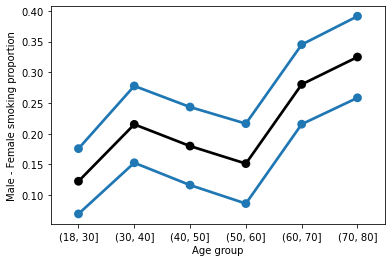

In [236]:
da["Age"] = pd.cut(da.RIDAGEYR, [18, 30, 40, 50, 60, 70, 80])
#da["SMQ020"] = da.SMQ020.replace({1: "Yes", 2: "No", 7: np.nan, 9: np.nan})  # np.nan represents a missing value
smoke_age = da.groupby(["Age", "RIAGENDRx"]).agg({"SMQ020x": lambda x: np.mean(x=="Yes")}).unstack()
smoke_age.columns = ["Female", "Male"]

sizes = da.groupby(["Age", "RIAGENDRx"]).agg({"SMQ020x": np.size}).unstack()
sizes.columns = ["Female", "Male"]

# Standard errors for each proportion
se = np.sqrt(smoke_age * (1 - smoke_age) / sizes)
se_diff = np.sqrt(se.Female**2 + se.Male**2)
print("Standard error difference:\n", se_diff)

# The difference in smoking rates between genders
pq = smoke_age.Male - smoke_age.Female
print("\nDifference in smoking rates between genders:\n", pq)


# Graph
x = np.arange(pq.size)
pp = sns.pointplot(x, pq.values, color='black')
sns.pointplot(x, pq - 2*se_diff)
sns.pointplot(x, pq + 2*se_diff)
pp.set_xticklabels(pq.index)
pp.set_xlabel("Age group")
pp.set_ylabel("Male - Female smoking proportion")